In [221]:
#It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers
#are not charged for items that they did not purchase.The dataset contains transactions made by credit cards in 
#September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492
#frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% 
#of all transactions.It contains only numerical input variables which are the result of a PCA transformation. 
#Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information
#about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have 
#not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each 
#transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature 
#can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value
#1 in case of fraud and 0 otherwise.

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, roc_auc_score,  plot_confusion_matrix, roc_curve, classification_report,average_precision_score,brier_score_loss,f1_score,confusion_matrix,matthews_corrcoef,plot_precision_recall_curve,plot_roc_curve
from sklearn import metrics
from sklearn.covariance import EllipticEnvelope
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDOneClassSVM
from itertools import product
from sklearn.neighbors import LocalOutlierFactor

In [223]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [224]:
df=df[0:30000]

In [225]:
#view some basic statistical details
df.describe().T.style.background_gradient(subset="mean",axis=0,cmap="bwr",vmin=.5,vmax=1,low=.4,high=.8)\
                        .background_gradient(subset=["std","50%"],axis=0,cmap="bwr")\
                        .background_gradient(subset="max",axis=0,cmap="Blues_r",low=.2,high=.9)

,count,mean,std,min,25%,50%,75%,max
Time,30000.000000,21511.026933,12054.474984,0.000000,10235.750000,26325.000000,32277.000000,35731.000000
V1,30000.000000,-0.208711,1.844420,-30.552380,-0.950987,-0.248095,1.165687,1.960497
V2,30000.000000,0.122291,1.544027,-40.978852,-0.449388,0.147365,0.784608,16.713389
V3,30000.000000,0.720742,1.609977,-31.103685,0.260535,0.844310,1.472752,4.101716
V4,30000.000000,0.212312,1.418612,-5.172595,-0.698415,0.198729,1.095230,13.143668
V5,30000.000000,-0.204250,1.417595,-42.147898,-0.799721,-0.237166,0.312612,34.099309
V6,30000.000000,0.088234,1.319748,-23.496714,-0.654424,-0.170861,0.473905,22.529298
V7,30000.000000,-0.120524,1.290070,-26.548144,-0.595615,-0.068120,0.443899,36.677268
V8,30000.000000,0.031103,1.284092,-41.484823,-0.160191,0.036125,0.294090,20.007208
V9,30000.000000,0.347071,1.256412,-7.175097,-0.460244,0.240485,1.100934,10.392889


In [226]:
#get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    30000 non-null  float64
 1   V1      30000 non-null  float64
 2   V2      30000 non-null  float64
 3   V3      30000 non-null  float64
 4   V4      30000 non-null  float64
 5   V5      30000 non-null  float64
 6   V6      30000 non-null  float64
 7   V7      30000 non-null  float64
 8   V8      30000 non-null  float64
 9   V9      30000 non-null  float64
 10  V10     30000 non-null  float64
 11  V11     30000 non-null  float64
 12  V12     30000 non-null  float64
 13  V13     30000 non-null  float64
 14  V14     30000 non-null  float64
 15  V15     30000 non-null  float64
 16  V16     30000 non-null  float64
 17  V17     30000 non-null  float64
 18  V18     30000 non-null  float64
 19  V19     30000 non-null  float64
 20  V20     30000 non-null  float64
 21  V21     30000 non-null  float64
 22

In [227]:
#check shape
df.shape

(30000, 31)

In [228]:
#check duplicates
df.duplicated().sum()

121

In [229]:
#remove duplicates
df.drop_duplicates(inplace = True)

In [230]:
#check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

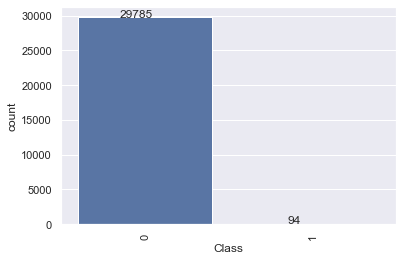

In [231]:
#imbalanced class distribution 
sns.set(font_scale = 1)
ax = plt.subplot(1,1,1)
sns.countplot(data=df,x='Class')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=90);

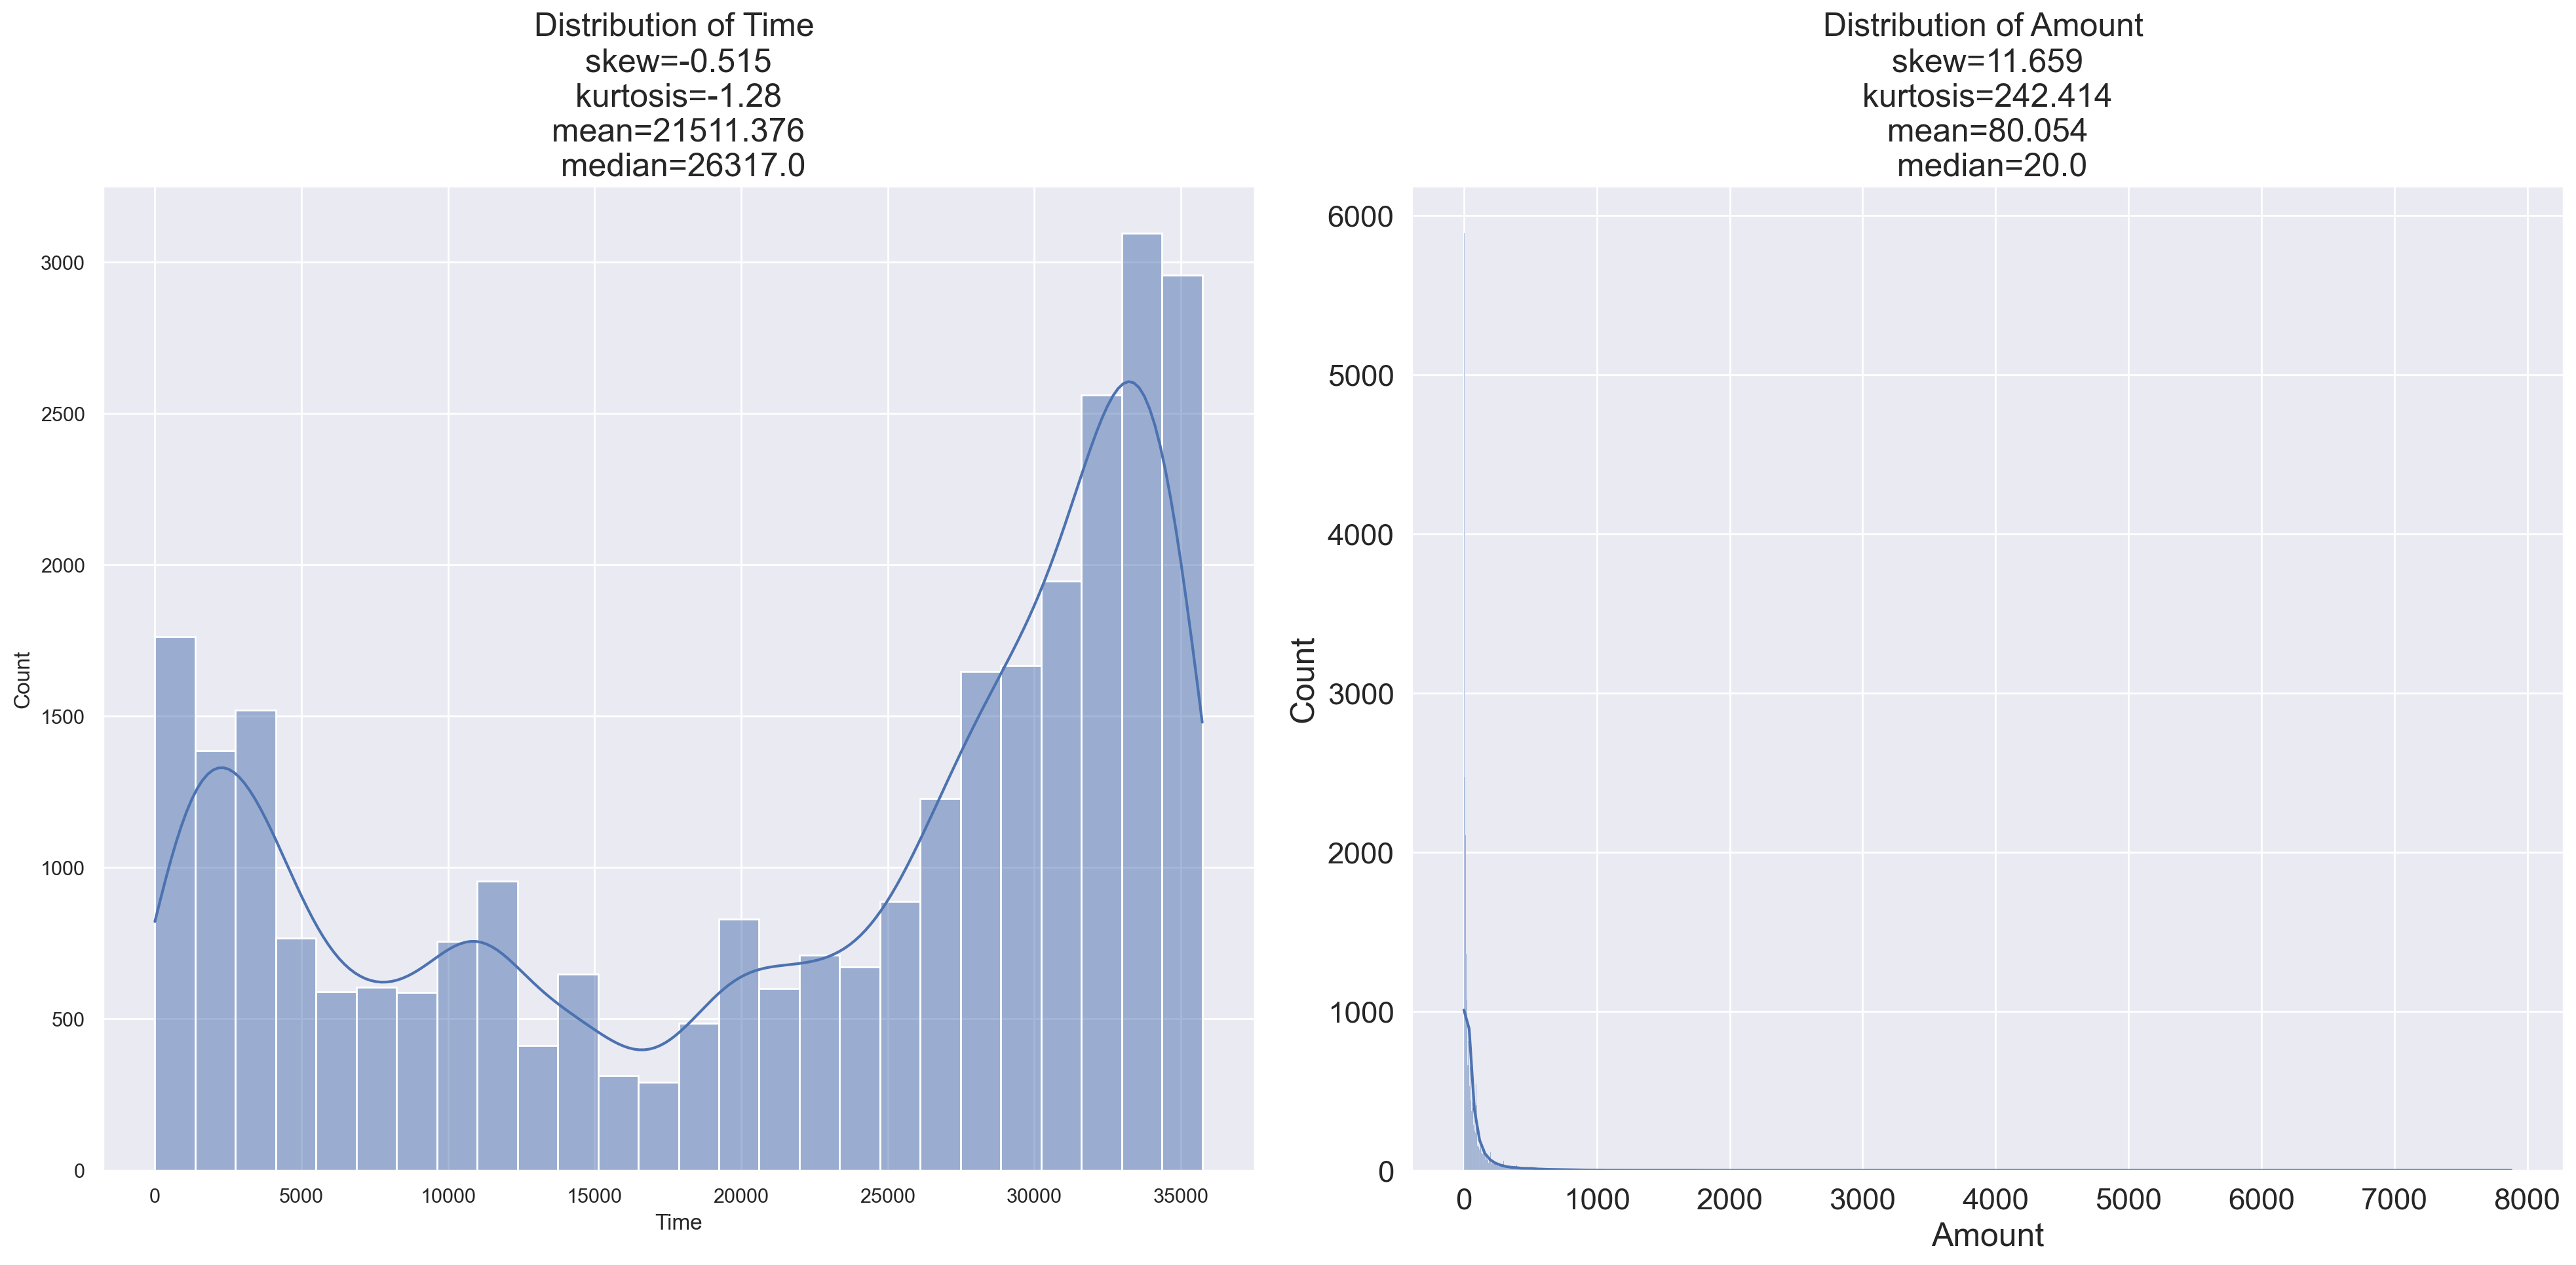

In [232]:
#univariate analysis for the numerical features
#histogram/skew(If the skewness is between -0.5 and 0.5, the data are fairly symmetrical)/kurtosis(Kurtosis=3 looks more close to a normal distribution)/mean/median

col_list=['Time','Amount']
plt.figure(figsize=(20,10),dpi=200)
for j,col in enumerate(col_list):
    plt.subplot(1,2,j+1)
    sns.set(font_scale = 1.5)
    sns.histplot(data=df,x=df[col],kde=True)
    skew=np.round(df[col].skew(),3)
    kurtosis=np.round(df[col].kurtosis(),3)
    mean=np.round(df[col].mean(),3)
    median=np.round(df[col].median(),3)
    plt.title(f'Distribution of {col} \n skew={skew} \n kurtosis={kurtosis} \n mean={mean} \n median={median}')
    plt.tight_layout()
plt.show()

In [233]:
#Feature distribution
col_list=df.drop(['Time','Amount','Class'],axis=1)
plt.figure(figsize=(45,40),dpi=200)
for j,col in enumerate(col_list):
    plt.subplot(10,3,j+1)
    sns.set(font_scale = 1.5)
    sns.histplot(data=df,x=df[col],kde=True)
    skew=np.round(df[col].skew(),3)
    kurtosis=np.round(df[col].kurtosis(),3)
    mean=np.round(df[col].mean(),3)
    median=np.round(df[col].median(),3)
    plt.title(f'Distribution of {col} \n skew={skew} \n kurtosis={kurtosis} \n mean={mean} \n median={median}')
    plt.tight_layout()
plt.show()

In [234]:
#Split the datase into Fraud and Genuine 
fraud = df[df['Class']==1]
genuine = df[df['Class']==0]

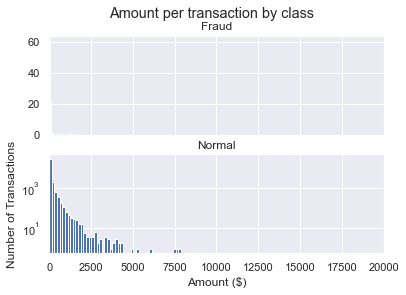

In [235]:
#Amount distribution per each split(Fraud/Normal)
sns.set(font_scale = 1)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(genuine.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

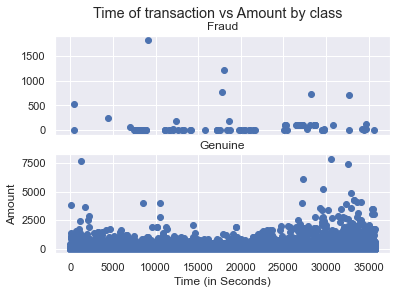

In [236]:
# Do fraudulent transactions occur more often during certain time frame ? 
sns.set(font_scale = 1)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

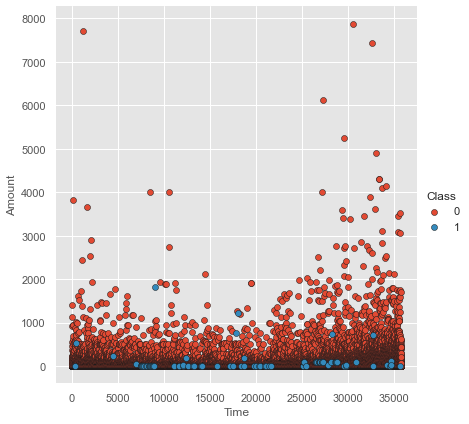

In [237]:
plt.style.use("ggplot")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()
plt.show()
#The above plot shows that there are frauds only on the transactions which have transaction 
#amount less than 2500 (approx). However, the frauds in the transactions are evenly distributed throughout all times.

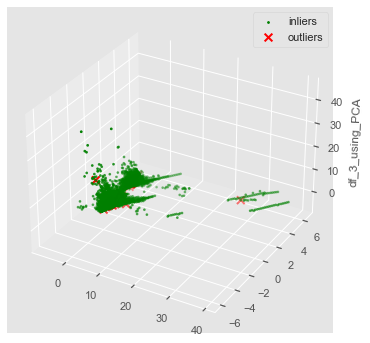

In [241]:
#reduce the dataset into three principal components and then plot the figure to visualize 
#anomalies. The red cross points are outliers and the green points are inliers.
pca = PCA(n_components=3)  
to_model_cols = df.columns[0:30]
outliers = df.loc[df['Class']==1]
outlier_index=list(outliers.index)
scaler = StandardScaler()
X = scaler.fit_transform(df[to_model_cols])
X_reduce = pca.fit_transform(X)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("df_3_using_PCA")
# Plotting compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=3, lw=1, label="inliers",c="green")
# Plot x for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           s=60, lw=2, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [242]:
from sklearn.manifold import TSNE
standardized_data = StandardScaler().fit_transform(df)
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=250)
standardized_data_reduced = tsne.fit_transform(standardized_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 29879 samples in 0.007s...
[t-SNE] Computed neighbors for 29879 samples in 1.888s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29879
[t-SNE] Computed conditional probabilities for sample 2000 / 29879
[t-SNE] Computed conditional probabilities for sample 3000 / 29879
[t-SNE] Computed conditional probabilities for sample 4000 / 29879
[t-SNE] Computed conditional probabilities for sample 5000 / 29879
[t-SNE] Computed conditional probabilities for sample 6000 / 29879
[t-SNE] Computed conditional probabilities for sample 7000 / 29879
[t-SNE] Computed conditional probabilities for sample 8000 / 29879
[t-SNE] Computed conditional probabilities for sample 9000 / 29879
[t-SNE] Computed conditional probabilities for sample 10000 / 29879
[t-SNE] Computed conditional probabilities for sample 11000 / 29879
[t-SNE] Computed conditional probabilities for sample 12000 / 29879
[t-SNE] Computed conditional probabilities for sa

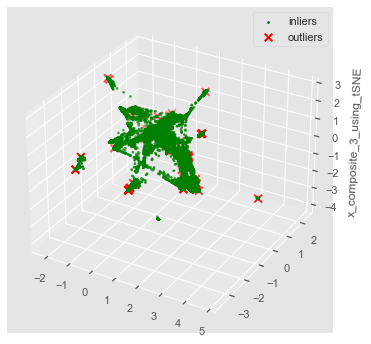

In [243]:
#dim reduction technique that tries to preserve the structure of the data
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3_using_tSNE")
# Plotting the compressed data points
ax.scatter(standardized_data_reduced[:, 0], standardized_data_reduced[:, 1], zs=standardized_data_reduced[:, 2], s=3, lw=1, label="inliers",c="green")
# Plot x(s) for the ground truth outliers
out_index = [i for i in outlier_index if i <= 50000]
ax.scatter(standardized_data_reduced[out_index,0],standardized_data_reduced[out_index,1], standardized_data_reduced[out_index,2], lw=2, s=60, 
           marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [244]:
#Isolation Forest - ignoring the class(Unsupervised)
#hyperparameter tuning Isolation Forest knowing the contamination parameter.Otherwise we would have to tune it too.
estimators=[10,20]
max_samples=[0.3,0.8]
max_features=[0.3,0.8]
scores=()
n_outliers = len(df[df['Class']==1])
outlier_fraction = len(df[df['Class']==1])/float(len(df[df['Class']==0]))
for e,ms,mf in product(estimators,max_samples,max_features):
    datacopy = df.copy()
    to_model_cols = datacopy.columns[0:30]
    clf=IsolationForest(n_estimators=e, max_samples=ms , contamination=outlier_fraction,max_features=mf, n_jobs=-1,random_state=12,  verbose=0)
    to_model_cols = datacopy.columns[0:30]
    clf.fit(datacopy[to_model_cols])
    pred = clf.predict(datacopy[to_model_cols])
    datacopy['Class'] = pred
    outliers = datacopy.loc[datacopy['Class']==-1]
    outlier_index=list(outliers.index)
    print(f'Outliers number for {e} x {ms} x {mf} : '+ str(len(outliers)))

Outliers number for 10 x 0.3 x 0.3 : 95
Outliers number for 10 x 0.3 x 0.8 : 93
Outliers number for 10 x 0.8 x 0.3 : 95
Outliers number for 10 x 0.8 x 0.8 : 95
Outliers number for 20 x 0.3 x 0.3 : 95
Outliers number for 20 x 0.3 x 0.8 : 95
Outliers number for 20 x 0.8 x 0.3 : 95
Outliers number for 20 x 0.8 x 0.8 : 95


In [245]:
#use the best model for visualizations
datacopy = df.copy()
to_model_cols = datacopy.columns[0:30]
clf = IsolationForest(n_estimators=10, max_samples=0.3, contamination=float(.0009), 
                      max_features=0.3, bootstrap=False, n_jobs=-1, random_state=12, verbose=0)
clf.fit(datacopy[to_model_cols])
pred = clf.predict(datacopy[to_model_cols])
datacopy['Class'] = pred
outliers = datacopy.loc[datacopy['Class']==-1]
outlier_index=list(outliers.index)

In [246]:
cmap=np.array(["skyblue","red"])
def plot_if(i):
    plt.scatter(df.iloc[:,i],df.iloc[:,i+1],c="skyblue",s=40, edgecolor="k")
    plt.scatter(outliers.iloc[:,i],outliers.iloc[:,i+1],c="red", s=40, edgecolor="k")
    plt.title("Visualize Local Outlier Factors between Feature Pair: V{} and V{}".format(i,i+1))
    plt.xlabel("V{}".format(i))
    plt.ylabel("V{}".format(i+1))

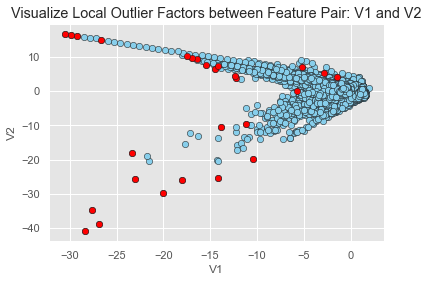

In [247]:
plot_if(1)

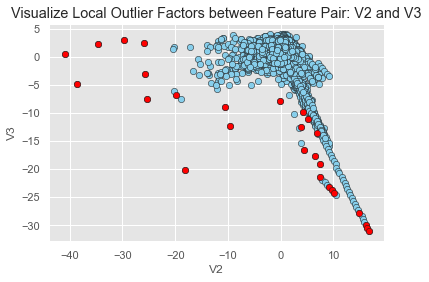

In [248]:
plot_if(2)

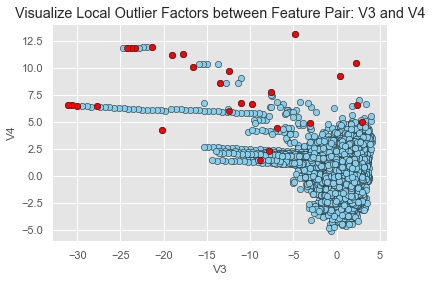

In [249]:
plot_if(3)

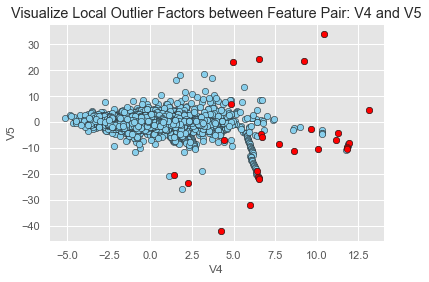

In [250]:
plot_if(4)

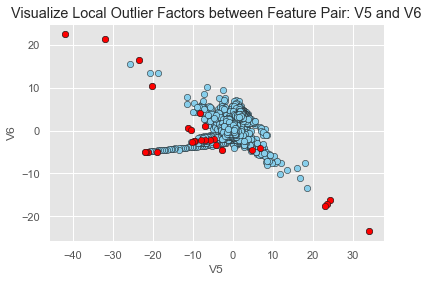

In [251]:
plot_if(5)

No. of Anomalous Points with Isolation Forest : 99
Confusion matrix:
[[29735    50]
 [   49    45]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29785
           1       0.47      0.48      0.48        94

    accuracy                           1.00     29879
   macro avg       0.74      0.74      0.74     29879
weighted avg       1.00      1.00      1.00     29879



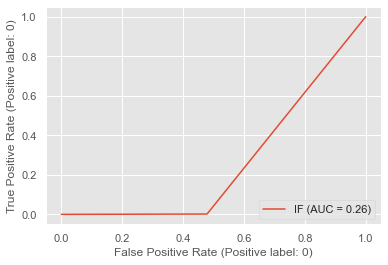

In [252]:
#Isolation Forest using the feature Class(Supervised)
n_outliers = len(df[df['Class']==1])
outlier_fraction = len(df[df['Class']==1])/float(len(df[df['Class']==0]))
clf = IsolationForest(n_estimators=100, max_samples=len(df.loc[:,df.columns!='Class']), 
                      contamination=outlier_fraction, random_state=12, verbose=0)
X = df.loc[:,df.columns!='Class']
Y = df['Class']
clf.fit(X)
scores_prediction = clf.decision_function(X)
y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()

print("{}: {}".format("No. of Anomalous Points with Isolation Forest ",n_errors))
print('Confusion matrix:')
print(confusion_matrix(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))

display = RocCurveDisplay.from_predictions(
            df['Class'],
            y_pred,
            pos_label=0,
            name='IF'
        )

In [272]:
#Local Outlier Factor - without labels(Unsupervised)
n_neighbors=[20,30]
p=[1,2]

n_outliers = len(df[df['Class']==1])
outlier_fraction = len(df[df['Class']==1])/float(len(df[df['Class']==0]))
standardized_data_without_class = StandardScaler().fit_transform(df.loc[:,df.columns!='Class'])
for n,p in product(n_neighbors,p):
    datacopy = df.copy()
    clf_lof=LocalOutlierFactor(n_neighbors=n, algorithm='auto', contamination=outlier_fraction,p=p)
    y_pred = clf_lof.fit_predict(standardized_data_without_class)
    datacopy['Class'] = pred
    LOF_Scores = clf_lof.negative_outlier_factor_
    LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
    LOF_anomalies=standardized_data_without_class[LOF_pred==-1]
    
    outliers = datacopy.loc[datacopy['Class']==-1]
    outlier_index=list(outliers.index)
    print(f'Outliers number for {n} x {p} : '+ str(len(LOF_anomalies)))

Outliers number for 20 x 1 : 0
Outliers number for 20 x 2 : 0
Outliers number for 30 x 1 : 0
Outliers number for 30 x 2 : 0


In [273]:
#choose best model to visualize
clf_lof = LocalOutlierFactor(n_neighbors=30, algorithm='auto', contamination=outlier_fraction)
standardized_data_without_class = StandardScaler().fit_transform(df.loc[:,df.columns!='Class'])
y_pred = clf_lof.fit_predict(standardized_data_without_class)
LOF_Scores = clf_lof.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies=standardized_data_without_class[LOF_pred==1]

In [274]:
#visualize samples of feature pairs / anomaly pairs scatter plots
cmap=np.array(["skyblue","red"])
def plot_lof(i):
    plt.scatter(df.iloc[:,i],df.iloc[:,i+1],c="skyblue",s=40, edgecolor="k")
    plt.scatter(LOF_anomalies[:,i],LOF_anomalies[:,i+1],c="red", s=40, edgecolor="k")
    plt.title("Visualize Local Outlier Factors between Feature Pair: V{} and V{}".format(i,i+1))
    plt.xlabel("V{}".format(i))
    plt.ylabel("V{}".format(i+1))

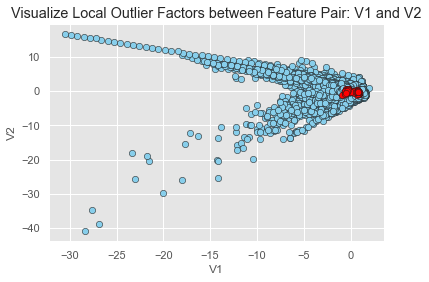

In [275]:
plot_lof(1)

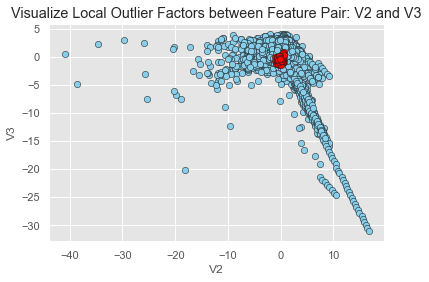

In [276]:
plot_lof(2)

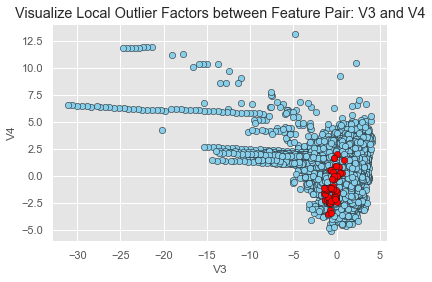

In [277]:
plot_lof(3)

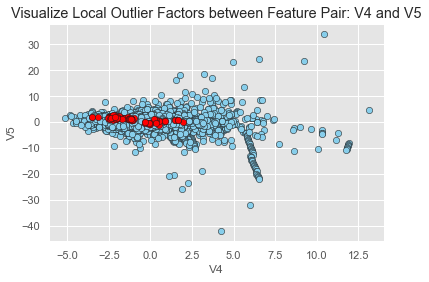

In [278]:
plot_lof(4)

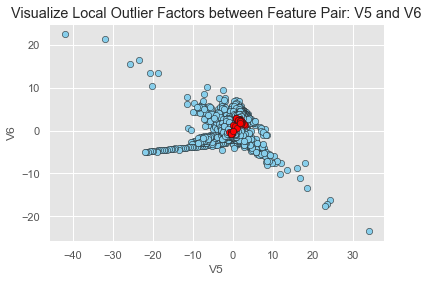

In [279]:
plot_lof(5)

No. of Anomalous Points with Local Outlier Factors : 185
Confusion matrix:
[[29692    93]
 [   92     2]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29785
           1       0.02      0.02      0.02        94

    accuracy                           0.99     29879
   macro avg       0.51      0.51      0.51     29879
weighted avg       0.99      0.99      0.99     29879



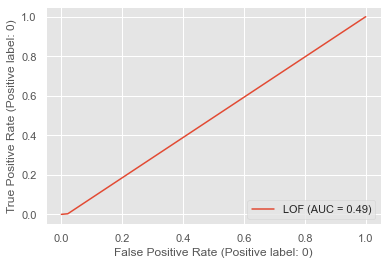

In [280]:
#Local Outlier Factor using labels (Supervised) 
n_outliers = len(df[df['Class']==1])
outlier_fraction = len(df[df['Class']==1])/float(len(df[df['Class']==0]))
clflof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', contamination=outlier_fraction)
X = df.loc[:,df.columns!='Class']
Y = df['Class']
y_pred = clflof.fit_predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("{}: {}".format("No. of Anomalous Points with Local Outlier Factors ",n_errors))
print('Confusion matrix:')
print(confusion_matrix(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))
display = RocCurveDisplay.from_predictions(
            df['Class'],
            y_pred,
            pos_label=0,
            name='LOF'
        )

In [281]:
##Elliptic Envelope - Unsupervised method
support_fraction=[0.5,0.7]
assume_centered=[True,False]
n_outliers = len(df[df['Class']==1])
outlier_fraction = len(df[df['Class']==1])/float(len(df[df['Class']==0]))
for s,a in product(support_fraction,assume_centered):
    datacopy = df.copy()
    clf_ee = EllipticEnvelope(assume_centered=a, contamination=outlier_fraction, random_state=12, store_precision=True, 
                          support_fraction=s)
    y_predict = clf_ee.fit_predict(standardized_data_without_class)
    ee_predict = pd.Series(y_predict).replace([-1,1],[1,0])
    ee_anomalies = standardized_data_without_class[ee_predict==1]
    print(f'Outliers number for {s} x {a} : '+ str(len(ee_anomalies)))

Outliers number for 0.5 x True : 95
Outliers number for 0.5 x False : 95
Outliers number for 0.7 x True : 95
Outliers number for 0.7 x False : 95


In [282]:
#choose the best alg to make some visualizations
clf_ee = EllipticEnvelope(assume_centered=False, contamination=outlier_fraction, random_state=12, store_precision=True, 
                          support_fraction=0.7)
y_predict = clf_ee.fit_predict(standardized_data_without_class)
ee_predict = pd.Series(y_predict).replace([-1,1],[1,0])
ee_anomalies = standardized_data_without_class[ee_predict==1]

In [283]:
cmap=np.array(['skyblue','red'])
def plot_EE(i):
    plt.scatter(df.iloc[:,i],df.iloc[:,i+1],c='skyblue',s=40, edgecolor="k")
    plt.scatter(ee_anomalies[:,i],ee_anomalies[:,i+1],c='red', s=40, edgecolor="k")
    plt.title("Visualize Elliptic Envelope Anomalies between Feature Pair: V{} and V{}".format(i,i+1))
    plt.xlabel("V{}".format(i))
    plt.ylabel("V{}".format(i+1))

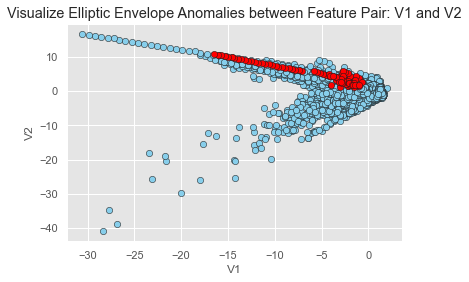

In [284]:
plot_EE(1)

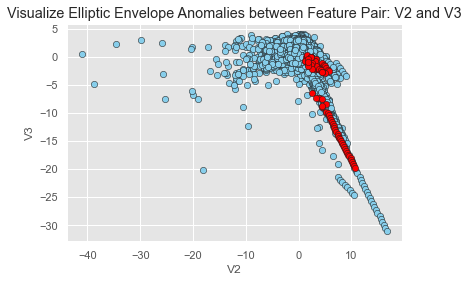

In [285]:
plot_EE(2)

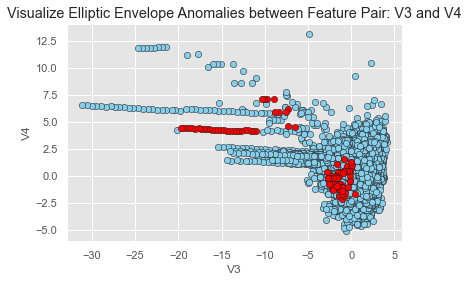

In [286]:
plot_EE(3)

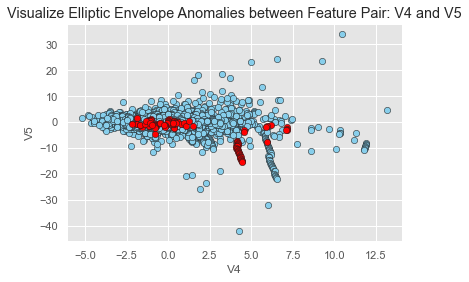

In [287]:
plot_EE(4)

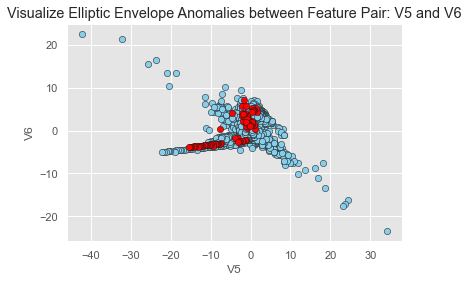

In [288]:
plot_EE(5)

No. of Anomalous Points with Elliptic Envelope : 147
Confusion matrix:
[[29711    74]
 [   73    21]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29785
           1       0.22      0.22      0.22        94

    accuracy                           1.00     29879
   macro avg       0.61      0.61      0.61     29879
weighted avg       1.00      1.00      1.00     29879



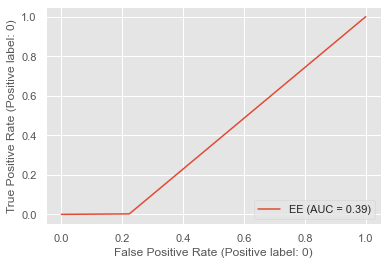

In [289]:
#Elliptic Envelope with label (Supervised)
n_outliers = len(df[df['Class']==1])
outlier_fraction = len(df[df['Class']==1])/float(len(df[df['Class']==0]))
clfee = EllipticEnvelope(assume_centered=False, contamination=outlier_fraction, random_state=12, 
                         store_precision=True, support_fraction=0.7)
X = df.loc[:,df.columns!='Class']
Y = df['Class']
y_pred = clfee.fit_predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("{}: {}".format("No. of Anomalous Points with Elliptic Envelope ",n_errors))
print('Confusion matrix:')
print(confusion_matrix(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))
display = RocCurveDisplay.from_predictions(
            df['Class'],
            y_pred,
            pos_label=0,
            name='EE'
        )

In [290]:
#One-Class SVM clustering - Unsupervised 
kernel=['poly','rbf']
degree=[2,3,4]
nu=[0.01,0.5]
standardized_data_without_class = StandardScaler().fit_transform(df.loc[:,df.columns!='Class'])
for k,d,n in product(kernel,degree,nu):
    clf_svm = svm.OneClassSVM(kernel=k, degree=d, gamma='scale', nu=n, max_iter=-1)
    y_predict = clf_svm.fit_predict(standardized_data_without_class)
    svm_predict = pd.Series(y_predict).replace([-1,1],[1,0])
    svm_anomalies = standardized_data_without_class[svm_predict==1]
    print(f'Outliers number for {k} x {d} x {n}: '+ str(len(svm_anomalies)))

Outliers number for poly x 2 x 0.01: 371
Outliers number for poly x 2 x 0.5: 14939
Outliers number for poly x 3 x 0.01: 371
Outliers number for poly x 3 x 0.5: 14939
Outliers number for poly x 4 x 0.01: 371
Outliers number for poly x 4 x 0.5: 14939
Outliers number for rbf x 2 x 0.01: 371
Outliers number for rbf x 2 x 0.5: 14939
Outliers number for rbf x 3 x 0.01: 371
Outliers number for rbf x 3 x 0.5: 14939
Outliers number for rbf x 4 x 0.01: 371
Outliers number for rbf x 4 x 0.5: 14939


In [291]:
n_outliers

94

In [292]:
#pick the best alg for visualization
clf_svm = svm.OneClassSVM(kernel="rbf", degree=3, gamma=0.1, nu=0.01, max_iter=-1)
y_predict = clf_svm.fit_predict(standardized_data_without_class)
svm_predict = pd.Series(y_predict).replace([-1,1],[1,0])
svm_anomalies = standardized_data_without_class[svm_predict==1]

In [293]:
cmap=np.array(['blue','red'])
def plot_OCSVM(i):
    plt.scatter(df.iloc[:,i],df.iloc[:,i+1],c='skyblue',s=40, edgecolor="k")
    plt.scatter(svm_anomalies[:,i],svm_anomalies[:,i+1],c='red', s=40, edgecolor="k")
    plt.title("Visualize OC-SVM Anomalies between Feature Pair: V{} and V{}".format(i,i+1))
    plt.xlabel("V{}".format(i))
    plt.ylabel("V{}".format(i+1))

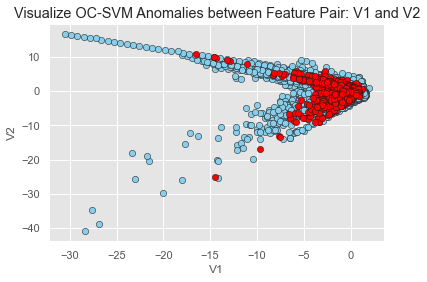

In [294]:
plot_OCSVM(1)

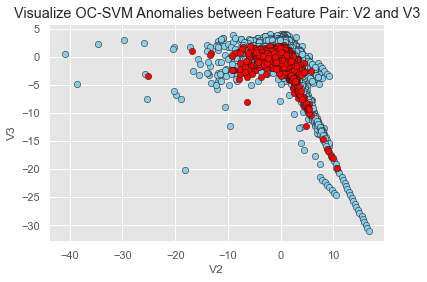

In [295]:
plot_OCSVM(2)

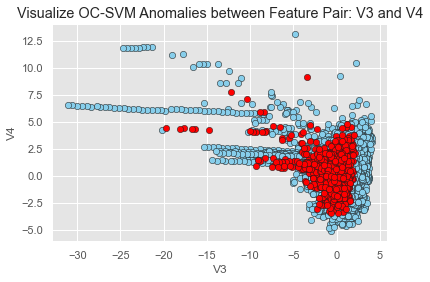

In [296]:
plot_OCSVM(3)

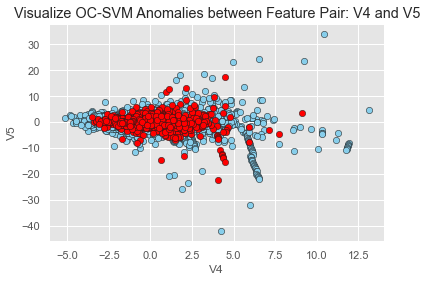

In [297]:
plot_OCSVM(4)

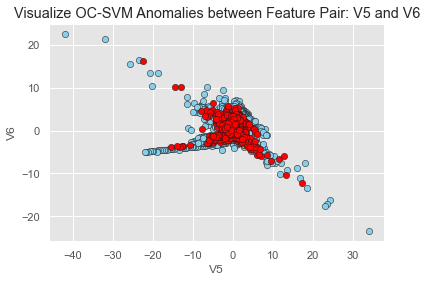

In [298]:
plot_OCSVM(5)

No. of Anomalous Points with One-Class SVM : 187
Confusion matrix:
[[29692    93]
 [   94     0]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29785
           1       0.00      0.00      0.00        94

    accuracy                           0.99     29879
   macro avg       0.50      0.50      0.50     29879
weighted avg       0.99      0.99      0.99     29879



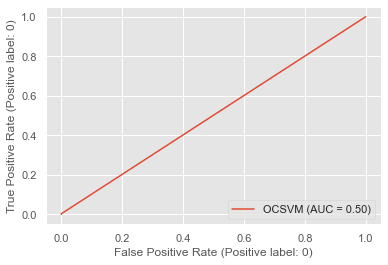

In [299]:
#One-Class SVM with labels (Supervised)
outlier_fraction = len(df[df['Class']==1])/float(len(df[df['Class']==0]))
clfsvm = svm.OneClassSVM(kernel="rbf", nu=outlier_fraction)
X = df.loc[:,df.columns!='Class']
Y = df['Class']
y_pred = clfsvm.fit_predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("{}: {}".format("No. of Anomalous Points with One-Class SVM ",n_errors))
print('Confusion matrix:')
print(confusion_matrix(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))
display = RocCurveDisplay.from_predictions(
            df['Class'],
            y_pred,
            pos_label=0,
            name='OCSVM'
        )

In [310]:
#Isolation Forest produces the best result
#novelty prediction
v=np.array([[0.0,1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.359807,-0.072781,2.536347,1.378155,149.62]])
clf.predict(v)

array([1])